#Import Libraries:

In [368]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import activations

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import models
from tensorflow.keras import layers

import numpy as np
from tqdm import tqdm
import math

import matplotlib.pyplot as plt

# Dataset:

In [260]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()
#(input_train, target_train), (input_test, target_test) = tensorflow.keras.datasets.cifar10.load_data()

In [261]:
input_train = input_train / 255
input_test = input_test / 255

print(f"input_train.shape = {input_train.shape}")
print(f"input_test.shape = {input_test.shape}")

input_train.shape = (60000, 28, 28)
input_test.shape = (10000, 28, 28)


In [262]:
if len(input_test.shape) == 3:
    input_train = np.expand_dims(input_train, axis=3)
    input_test = np.expand_dims(input_test, axis=3)

    print(f"input_train.shape = {input_train.shape}")
    print(f"input_test.shape = {input_test.shape}")
else:
    print(f"len(input_test.shape) = {len(input_test.shape)}")

input_train.shape = (60000, 28, 28, 1)
input_test.shape = (10000, 28, 28, 1)


In [263]:
num_classes = np.unique(target_test).shape[0]
num_classes

10

In [264]:
target_train = tensorflow.keras.utils.to_categorical(target_train, num_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, num_classes)

In [265]:
print(f"target_train.shape = {target_train.shape}")
print(f"target_test.shape = {target_test.shape}")

target_train.shape = (60000, 10)
target_test.shape = (10000, 10)


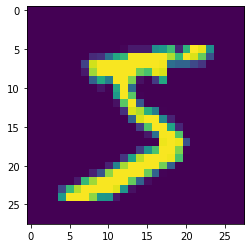

In [266]:
import matplotlib.pyplot as plt
if input_test.shape[-1] == 1:
    plt.imshow(input_train[0,:,:,0])
else:
    plt.imshow(input_train[0,:,:,:])
plt.show()

# Model:

In [406]:
# Model configuration
batch_size = 250
no_epochs = 1

In [407]:
input_train.shape

(60000, 28, 28, 1)

In [408]:
inputs = Input(input_train.shape[1:])
x = inputs

x = Conv2D(6, kernel_size=(5, 5), activation='relu', name='L1_Conv2D_1')(x)
x = MaxPooling2D(pool_size=(2, 2), name='L2_MaxPooling2D_1')(x)
x = Conv2D(10, kernel_size=(5, 5), activation='relu', name='L3_Conv2D_2')(x)
x = Conv2D(256, kernel_size=(5, 5), activation='relu', name='L4_Conv2D_3')(x)

x = Flatten(name='L4_Flatten_1')(x)
x = Dense(256, activation='relu', name='L5_Dense_1')(x)
x = Dense(4096, activation='relu', name='L6_Dense_2')(x)

outputs = Dense(num_classes, activation='softmax', name='L7_Dense_2')(x)

model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
L1_Conv2D_1 (Conv2D)         (None, 24, 24, 6)         156       
_________________________________________________________________
L2_MaxPooling2D_1 (MaxPoolin (None, 12, 12, 6)         0         
_________________________________________________________________
L3_Conv2D_2 (Conv2D)         (None, 8, 8, 10)          1510      
_________________________________________________________________
L4_Conv2D_3 (Conv2D)         (None, 4, 4, 256)         64256     
_________________________________________________________________
L4_Flatten_1 (Flatten)       (None, 4096)              0         
_________________________________________________________________
L5_Dense_1 (Dense)           (None, 256)               104

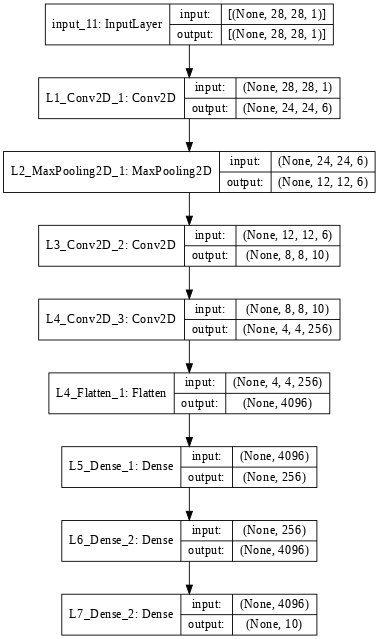

In [409]:
#'''
tensorflow.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64
)
#'''

In [410]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [411]:
# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=1,
          #validation_split=validation_split,
          validation_data=(input_test, target_test)
          )

240/240 [==============================] - 50s 205ms/step - loss: 0.2782 - accuracy: 0.9125 - val_loss: 0.0736 - val_accuracy: 0.9760


In [412]:
# Generate generalization metrics 
score = model.evaluate(input_test, target_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 4s 13ms/step - loss: 0.0736 - accuracy: 0.9760
Test loss: 0.07362323254346848 / Test accuracy: 0.9760000109672546


# Generating layer output visualizations

In [413]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(input_test)

In [414]:
print(f"Total number of layers = {len(activations)}")
print(f"Number of images fed into model = {len(activations[0])}")

Total number of layers = 9
Number of images fed into model = 10000


In [415]:
# Getting Activations of first layer
first_layer_activation = activations[0]

In [416]:
# shape of first layer activation
print(first_layer_activation.shape)

(10000, 28, 28, 1)


Case-2: input_test.shape[-1] = 1



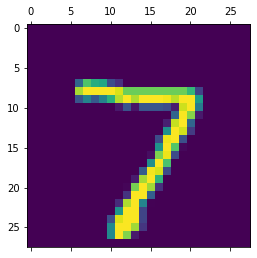

In [417]:
if  input_test.shape[-1] == 3:
    print(f"Case-1: input_test.shape[-1] = {input_test.shape[-1]}\n")
    plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')
    #plt.matshow(first_layer_activation[0, :, :, :], cmap ='viridis')
else:
    print(f"Case-2: input_test.shape[-1] = {input_test.shape[-1]}\n")
    plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis')
plt.show()

#Model Layers:

In [418]:
layer_names = []

for layer in model.layers:
  layer_names.append(layer.name)
print(layer_names)

['input_11', 'L1_Conv2D_1', 'L2_MaxPooling2D_1', 'L3_Conv2D_2', 'L4_Conv2D_3', 'L4_Flatten_1', 'L5_Dense_1', 'L6_Dense_2', 'L7_Dense_2']


#Visualize Activation Output Images in between a Range:

image_dimension = (4, 4)
num_neurons = 256



100it [00:00, 1258.86it/s]


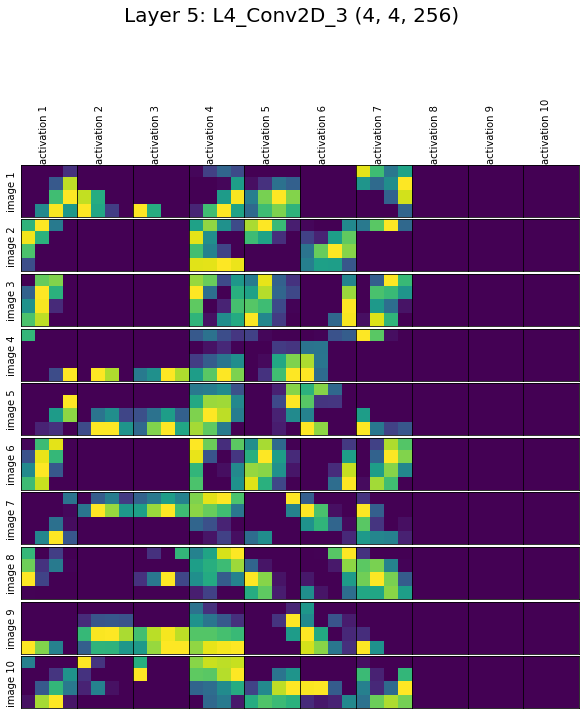

In [338]:
layer_no = 4 # starts from 0
current_layer = activations[layer_no]
print(f"image_dimension = {current_layer.shape[1:][:-1]}\nnum_neurons = {current_layer.shape[1:][-1]}\n")

sub_fig_num_rows = 10 # current_layer.shape[0]
sub_fig_num_cols = 10 # current_layer.shape[-1] # total number of activations in a layer
fig_heigth = 10
fig_width = 10

if len(current_layer.shape) == 4:
    fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_width,fig_heigth))
    plt.suptitle(f"Layer {str(layer_no+1)}: {layer_names[layer_no]} {str(current_layer.shape[1:])}", fontsize=20, y=1.1)

    for i,ax in tqdm(enumerate(axes.flat)):
        row = i//sub_fig_num_cols
        col = i%sub_fig_num_cols
        
        ax.imshow(current_layer[row, :, :, col], cmap ='viridis')
        ax.set_xticks([])
        ax.set_yticks([])
        if col == 0:
            ax.set_ylabel(f"image {str(row+1)}")
        if row == 0:
            ax.set_xlabel(f"activation {str(col+1)}", rotation=90, ha='right')
            ax.xaxis.set_label_position('top') 
        ax.set_aspect('auto')
    #fig.tight_layout()    
    plt.subplots_adjust(wspace=0, hspace=0.05)
else:
    print(f"Error: len(current_layer.shape) = {len(current_layer.shape)}. However, it has to be 4.")

#Visualize Certain Activation Output Images:

image_dimension = (12, 12)
num_neurons = 6



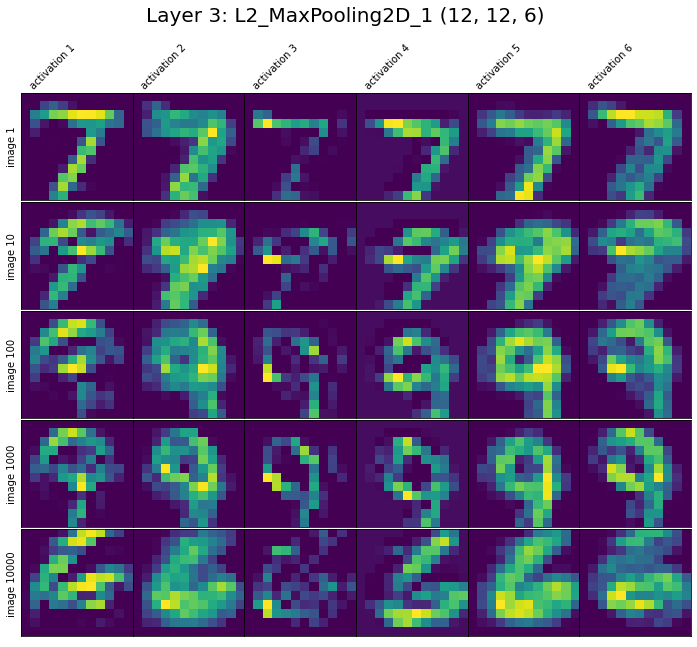

In [339]:
layer_no = 2 # starts from 0
current_layer = activations[layer_no]
print(f"image_dimension = {current_layer.shape[1:][:-1]}\nnum_neurons = {current_layer.shape[1:][-1]}\n")

image_index_list = [0, 9, 99, 999, 9999]
sub_fig_num_rows = len(image_index_list) # current_layer.shape[0]
sub_fig_num_cols = current_layer.shape[-1] # total number of activations in a layer
fig_heigth = 10
fig_width = 12

if len(current_layer.shape) == 4:
    fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_width,fig_heigth))
    plt.suptitle(f"Layer {str(layer_no+1)}: {layer_names[layer_no]} {str(current_layer.shape[1:])}", fontsize=20, y=1)

    for i,ax in enumerate(axes.flat):
        row = i//sub_fig_num_cols
        col = i%sub_fig_num_cols
        
        image_index = image_index_list[row]
        ax.imshow(current_layer[image_index, :, :, col], cmap ='viridis')
        ax.set_xticks([])
        ax.set_yticks([])
        if col == 0:
            ax.set_ylabel(f"image {str(image_index+1)}")
        if row == 0:
            ax.set_xlabel(f"activation {str(col+1)}", rotation=45, ha='right')
            ax.xaxis.set_label_position('top') 
        ax.set_aspect('auto')
    #fig.tight_layout()    
    plt.subplots_adjust(wspace=0, hspace=0.02)
else:
    print(f"Error: len(current_layer.shape) = {len(current_layer.shape)}. However, it has to be 4.")

#Dense Activation Output Visualization:

In [419]:
layer_no = -2 # starts from 0
current_layer = activations[layer_no]
print(f"image_dimension = {current_layer.shape}")
print(f"image_dimension = {current_layer.shape[1:]}")
print(f"num_neurons = {current_layer.shape[1]}\n")

image_dimension = (10000, 4096)
image_dimension = (4096,)
num_neurons = 4096



In [420]:
dense_output = current_layer[0]
print(f"type(dense_output) = {type(dense_output)}")
print(f"dense_output.shape = {dense_output.shape}")

type(dense_output) = <class 'numpy.ndarray'>
dense_output.shape = (4096,)


In [425]:
num_sqrt = math.floor(math.sqrt(dense_output.shape[0]))
img_shape = (num_sqrt,num_sqrt)
print(f"img_shape = {img_shape}")
print(f"Total pixels counted = {num_sqrt*num_sqrt}")

img_shape = (64, 64)
Total pixels counted = 4096


In [424]:
dense_output_trunc = dense_output[:(num_sqrt*num_sqrt)]
num_pixel_loss = dense_output.shape[0]-len(dense_output_trunc)

print(f"dense_output_trunc.shape = {dense_output_trunc.shape}")
print(f"num_pixel_loss = {num_pixel_loss}")

dense_output_trunc.shape = (4096,)
num_pixel_loss = 0


In [426]:
reshaped_output = np.reshape(dense_output_trunc, img_shape)
reshaped_output.shape

(64, 64)

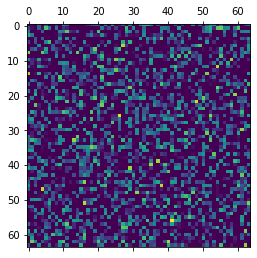

In [427]:
#plt.matshow(np.array([dense_output]), cmap ='viridis')
plt.matshow(reshaped_output, cmap ='viridis')